# INTRODUCTION

In these data, the characteristics of each house are explained by giving 79 different variables. The aim of this study is to predict the sales price for each house. A prediction model was created by choosing the most significant one among the variables. The linear regression model was chosen to create the model. House price prediction data set is used.

## FEATURES
*SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

*MSSubClass: The building class

*MSZoning: The general zoning classification

*LotFrontage: Linear feet of street connected to property

*LotArea: Lot size in square feet

*Street: Type of road access

*Alley: Type of alley access

*LotShape: General shape of property

*LandContour: Flatness of the property

*Utilities: Type of utilities available

*LotConfig: Lot configuration

*LandSlope: Slope of property

*Neighborhood: Physical locations within Ames city limits

*Condition1: Proximity to main road or railroad

*Condition2: Proximity to main road or railroad (if a second is present)

*BldgType: Type of dwelling

*HouseStyle: Style of dwelling

*OverallQual: Overall material and finish quality

*OverallCond: Overall condition rating

*YearBuilt: Original construction date

*YearRemodAdd: Remodel date

*RoofStyle: Type of roof

*RoofMatl: Roof material

*Exterior1st: Exterior covering on house

*Exterior2nd: Exterior covering on house (if more than one material)

*MasVnrType: Masonry veneer type

*MasVnrArea: Masonry veneer area in square feet

*ExterQual: Exterior material quality

*ExterCond: Present condition of the material on the exterior

*Foundation: Type of foundation

*BsmtQual: Height of the basement

*BsmtCond: General condition of the basement

*BsmtExposure: Walkout or garden level basement walls

*BsmtFinType1: Quality of basement finished area

*BsmtFinSF1: Type 1 finished square feet

*BsmtFinType2: Quality of second finished area (if present)

*BsmtFinSF2: Type 2 finished square feet

*BsmtUnfSF: Unfinished square feet of basement area

*TotalBsmtSF: Total square feet of basement area

*Heating: Type of heating

*HeatingQC: Heating quality and condition

*CentralAir: Central air conditioning

*Electrical: Electrical system

*1stFlrSF: First Floor square feet

*2ndFlrSF: Second floor square feet

*LowQualFinSF: Low quality finished square feet (all floors)

*GrLivArea: Above grade (ground) living area square feet

*BsmtFullBath: Basement full bathrooms

*BsmtHalfBath: Basement half bathrooms

*FullBath: Full bathrooms above grade

*HalfBath: Half baths above grade

*Bedroom: Number of bedrooms above basement level

*Kitchen: Number of kitchens

*KitchenQual: Kitchen quality

*TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

*Functional: Home functionality rating

*Fireplaces: Number of fireplaces

*FireplaceQu: Fireplace quality

*GarageType: Garage location

*GarageYrBlt: Year garage was built

*GarageFinish: Interior finish of the garage

*GarageCars: Size of garage in car capacity

*GarageArea: Size of garage in square feet

*GarageQual: Garage quality

*GarageCond: Garage condition

*PavedDrive: Paved driveway

*WoodDeckSF: Wood deck area in square feet

*OpenPorchSF: Open porch area in square feet

*EnclosedPorch: Enclosed porch area in square feet

*3SsnPorch: Three season porch area in square feet

*ScreenPorch: Screen porch area in square feet

*PoolArea: Pool area in square feet

*PoolQC: Pool quality

*Fence: Fence quality

*MiscFeature: Miscellaneous feature not covered in other categories

*MiscVal: $Value of miscellaneous feature

*MoSold: Month Sold

*YrSold: Year Sold

*SaleType: Type of sale

*SaleCondition: Condition of sale


# Libraries and Data

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from ml_metrics import rmse

In [243]:
train= pd.read_csv("data/train.csv")
test =pd.read_csv("data/test.csv")

In [244]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [245]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   Alley          76 non-null     object 
 7   LotShape       1259 non-null   object 
 8   LandContour    1259 non-null   object 
 9   Utilities      1259 non-null   object 
 10  LotConfig      1259 non-null   object 
 11  LandSlope      1259 non-null   object 
 12  Neighborhood   1259 non-null   object 
 13  Condition1     1259 non-null   object 
 14  Condition2     1259 non-null   object 
 15  BldgType       1259 non-null   object 
 16  HouseStyle     1259 non-null   object 
 17  OverallQual    1259 non-null   int64  
 18  OverallC

In [246]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1259.0,630.000000,363.586303,1.0,315.5,630.0,944.5,1259.0
MSSubClass,1259.0,56.914218,42.353617,20.0,20.0,50.0,70.0,190.0
LotFrontage,1041.0,70.110471,23.522213,21.0,59.0,70.0,80.0,313.0
LotArea,1259.0,10524.300238,10391.598333,1300.0,7590.0,9452.0,11611.0,215245.0
OverallQual,1259.0,6.103257,1.381394,1.0,5.0,6.0,7.0,10.0
OverallCond,1259.0,5.570294,1.119465,1.0,5.0,5.0,6.0,9.0
YearBuilt,1259.0,1971.478157,29.933659,1875.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1259.0,1984.816521,20.617506,1950.0,1966.5,1993.0,2004.0,2010.0
MasVnrArea,1252.0,103.133387,182.185126,0.0,0.0,0.0,166.0,1600.0
BsmtFinSF1,1259.0,443.334392,439.025793,0.0,0.0,385.0,712.0,2260.0


## Encoding

In [247]:
cat_col_train = train.select_dtypes(include=['object'])
cat_col_test = test.select_dtypes(include=['object'])
cat_col_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [248]:
encoder = LabelEncoder()
for label in cat_col_train:
    train[label] = encoder.fit_transform(train[label])
for label in cat_col_test:
    test[label] = encoder.fit_transform(test[label])

In [249]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,11,12,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,0,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,3,4,3,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,7,7,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,0,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,3,4,3,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,11,12,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,0,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,3,4,3,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,12,14,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,0,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,4,3,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,11,12,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,0,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,3,4,3,0,12,2008,8,4,250000


In [250]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1260,20,3,65.0,9750,0,2,3,3,0,2,0,11,2,0,0,2,6,8,1969,1969,1,1,4,4,2,0.0,3,2,1,2,2,3,0,602,3,438,14,1054,1,2,1,2,1054,0,0,1054,1,0,1,1,3,1,3,6,4,0,5,0,1969.0,2,2,460,2,3,2,180,0,0,0,80,0,2,4,2,0,7,2008,3,3
1,1261,60,3,NaN,24682,0,2,2,3,0,1,0,7,6,0,0,5,6,5,1999,1999,1,1,8,9,2,0.0,3,2,2,2,2,3,5,0,5,0,841,841,1,0,1,2,892,783,0,1675,0,0,2,1,3,1,3,7,4,1,4,2,1999.0,0,2,502,2,3,2,0,103,0,0,0,0,2,4,2,0,6,2009,3,3
2,1262,20,3,80.0,9600,0,2,3,3,0,4,0,11,2,0,0,2,5,6,1956,1956,3,1,5,5,2,0.0,3,2,1,3,2,3,4,504,5,0,546,1050,1,2,1,2,1050,0,0,1050,0,0,1,0,2,1,3,5,4,0,5,0,1956.0,2,1,338,2,3,2,0,0,0,0,0,0,2,4,2,0,6,2009,3,3
3,1263,50,3,NaN,11250,0,2,3,3,0,4,0,3,2,0,0,0,4,5,1957,1989,1,1,9,10,2,0.0,3,2,1,3,2,0,5,0,5,0,1104,1104,1,0,1,0,1104,684,0,1788,1,0,1,0,5,1,3,8,2,2,4,0,1957.0,2,1,304,2,3,2,120,0,0,0,0,0,2,4,2,0,11,2009,3,3
4,1264,70,3,60.0,13515,0,1,3,3,0,4,0,2,2,0,0,5,6,6,1919,1950,2,1,9,10,2,0.0,3,2,2,3,2,3,5,0,5,0,764,764,1,0,1,0,1060,764,0,1824,0,0,1,0,3,1,3,8,4,1,2,3,1940.0,2,2,520,2,3,0,0,0,126,0,0,0,2,0,2,0,7,2007,3,3


In [251]:
#train
dms1 = pd.get_dummies(cat_col_train)
train = train.drop(cat_col_train, axis=1)
train= pd.concat([train, dms1], axis=1)
#test
dms2 = pd.get_dummies(cat_col_test)
test = test.drop(cat_col_test, axis=1)
test= pd.concat([test, dms2], axis=1)

train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,Garage

In [252]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition2_Norm,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1260,20,65.0,9750,6,8,1969,1969,0.0,602,438,14,1054,1054,0,0,1054,1,0,1,1,3,1,6,0,1969.0,2,460,180,0,0,0,80,0,0,7,2008,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0

## Feature selection 

In [253]:
corr=train.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,Garage

In [254]:
corr["SalePrice"]

Id                      -0.022742
MSSubClass              -0.076628
LotFrontage              0.378138
LotArea                  0.267146
OverallQual              0.790786
                           ...   
SaleCondition_AdjLand   -0.053977
SaleCondition_Alloca    -0.027444
SaleCondition_Family    -0.042327
SaleCondition_Normal    -0.165875
SaleCondition_Partial    0.377486
Name: SalePrice, Length: 284, dtype: float64

In [255]:
print(train.corr().abs().nlargest(6, 'SalePrice').index)
print(train.corr().abs().nlargest(6, 'SalePrice').values[:,37])

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'GarageArea'],
      dtype='object')
[1.         0.79078604 0.73348035 0.6420789  0.64194639 0.62549916]


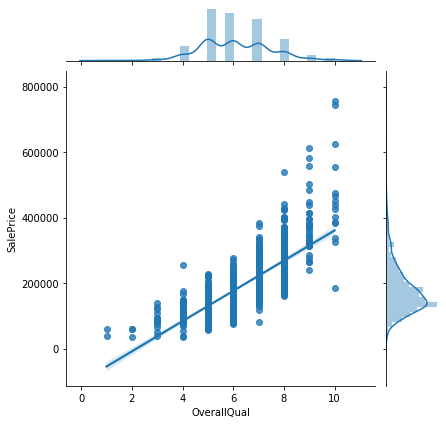

In [256]:
sns.jointplot(x = "OverallQual", y = "SalePrice", data = train, kind = "reg");

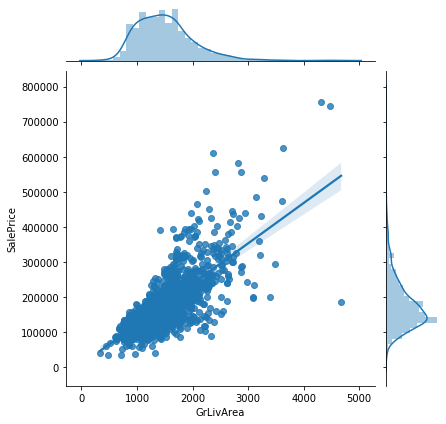

In [257]:
sns.jointplot(x = "GrLivArea", y = "SalePrice", data = train, kind = "reg");

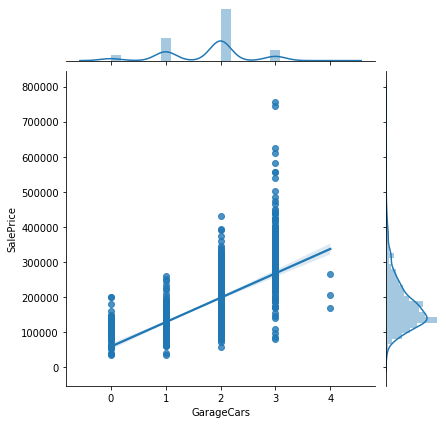

In [258]:
sns.jointplot(x = "GarageCars", y = "SalePrice", data = train, kind = "reg");

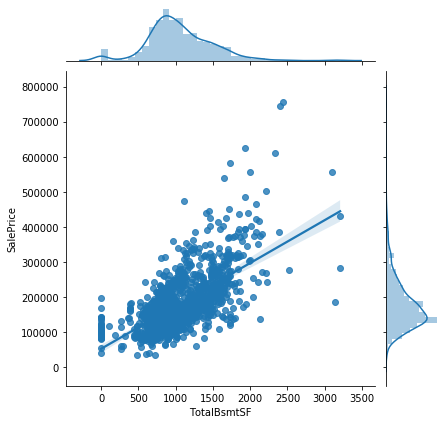

In [259]:
sns.jointplot(x = "TotalBsmtSF", y = "SalePrice", data = train, kind = "reg");

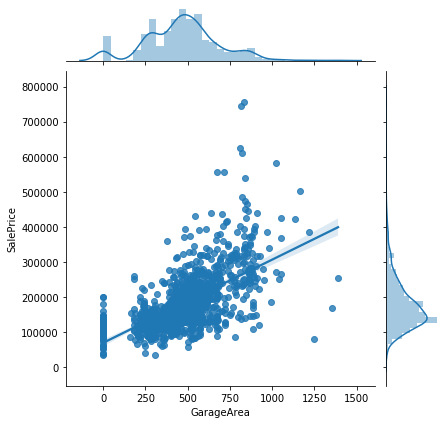

In [260]:
sns.jointplot(x = "GarageArea", y = "SalePrice", data = train, kind = "reg");

# Modeling

## linear regression model with 2 features

In [261]:
lm  = LinearRegression()

In [262]:
X = pd.DataFrame(np.c_[train['GrLivArea'], train['OverallQual']], columns = ['GrLivArea','OverallQual'])
y = train[["SalePrice"]]

In [263]:
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3,
random_state=5)

In [264]:
model = lm.fit(x_train, Y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(Y_test, model.predict(x_test))

In [265]:
y_pred[0:5]

array([[471618.89690476],
       [214537.41175961],
       [167493.78793247],
       [112286.29436778],
       [206491.85897478]])

In [266]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(Y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(Y_test, y_pred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(Y_test, y_pred))
# Root-Mean-Squared-Error (RMSE)
print("RMSE = %5.3f" % rmse(Y_test, y_pred))

MAE = 28689.546
R^2 = 0.74396
MSE = 1822431011.201
RMSE = 42689.940


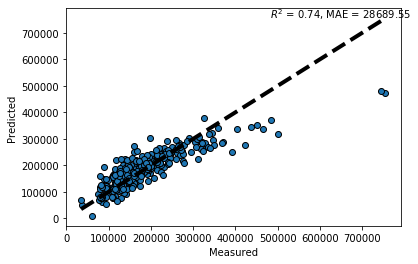

In [267]:
fig, ax = plt.subplots()
ax.scatter(Y_test, y_pred, edgecolors = (0, 0, 0))
ax.text(y_pred.max()-4.5, Y_test.max()-0.1, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(Y_test, y_pred), mean_absolute_error(Y_test, y_pred)))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [268]:
y.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1259.0,181144.81255,80588.024473,34900.0,129900.0,163500.0,213750.0,755000.0


## lineer regression model with 5 features

In [269]:
df=train.loc[:,['GrLivArea','OverallQual',"GarageArea","TotalBsmtSF","GarageCars"]]
y = train[["SalePrice"]]
df

,GrLivArea,OverallQual,GarageArea,TotalBsmtSF,GarageCars
0,1710,7,548,856,2
1,1262,6,460,1262,2
2,1786,7,608,920,2
3,1717,7,642,756,3
4,2198,8,836,1145,3
...,...,...,...,...,...
1254,1656,7,397,746,2
1255,1367,6,560,884,1
1256,1987,8,691,1986,2
1257,864,5,0,864,0


In [270]:
x_train, x_test, Y_train, Y_test = train_test_split(df, y, test_size = 0.3,
random_state=5)

In [271]:
model = lm.fit(x_train, Y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(Y_test, model.predict(x_test))

In [272]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(Y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(Y_test, y_pred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(Y_test, y_pred))
# Root-Mean-Squared-Error (RMSE)
print("RMSE = %5.3f" % rmse(Y_test, y_pred))

MAE = 24748.181
R^2 = 0.80149
MSE = 1412992789.030
RMSE = 37589.796


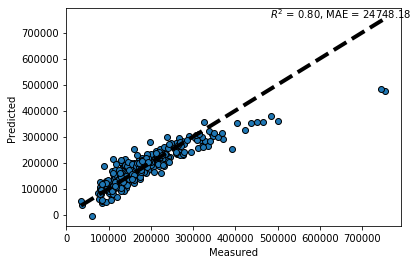

In [273]:
fig, ax = plt.subplots()
ax.scatter(Y_test, y_pred, edgecolors = (0, 0, 0))
ax.text(y_pred.max()-4.5, Y_test.max()-0.1, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(Y_test, y_pred), mean_absolute_error(Y_test, y_pred)))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

## Data exploring

In [274]:
final=test.loc[:,['GrLivArea','OverallQual',"GarageArea","TotalBsmtSF","GarageCars"]]
y_pred_test= model.predict(final)
submission  = pd.DataFrame()
submission['Id']=test['Id']
submission["SalePrice"]=y_pred_test
submission.info()
submission.to_csv('submission.csv', index=False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         201 non-null    int64  
 1   SalePrice  201 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB
